In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf

C:\Users\91626\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
##feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [11]:
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [12]:
##concat the variables above
##drop the existing columns
## axis=1 is used because we want to drop the column not the rows
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X=pd.concat([X,geography,gender],axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
## training testing split
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
X_train.shape

(8000, 11)

In [21]:
 ##ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [22]:
##intializing the ANN
classifier=Sequential()

In [23]:
##adding the input layer
classifier.add(Dense(units=11,activation='relu'))


In [24]:
##adding hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [25]:
##adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [26]:
##adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [29]:
##EarlyStopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)



In [30]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


536/536 [==============================] - 6s 7ms/step - loss: 0.4980 - accuracy: 0.7921 - val_loss: 0.4525 - val_accuracy: 0.7970
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4317 - accuracy: 0.8059 - val_loss: 0.4325 - val_accuracy: 0.8046
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4134 - accuracy: 0.8123 - val_loss: 0.4223 - val_accuracy: 0.8095
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3991 - accuracy: 0.8207 - val_loss: 0.4131 - val_accuracy: 0.8167
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3855 - accuracy: 0.8300 - val_loss: 0.3991 - val_accuracy: 0.8228
Epoch 6/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3741 - accuracy: 0.8410 - val_loss: 0.3884 - val_accuracy: 0.8266
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3632 - accuracy: 0.8517 - val_loss: 0.3778 - val_accurac

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

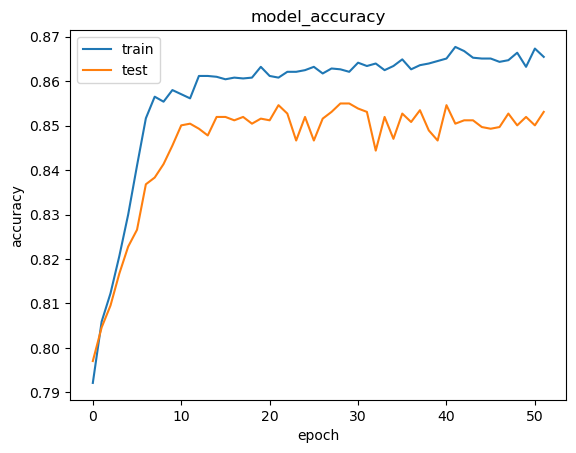

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

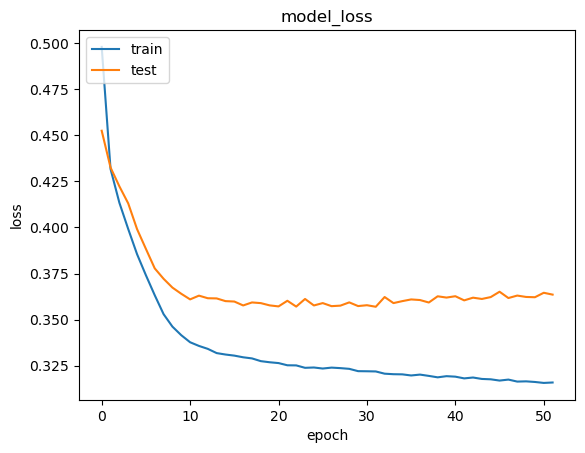

In [36]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [38]:
##preddicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [39]:
##make confusion metric
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

In [40]:
cm

array([[1518,   77],
       [ 214,  191]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)

In [42]:
score

0.8545

In [43]:
##get the weights
classifier.get_weights()

[array([[-0.06527334,  0.2953669 , -0.10217479, -0.01850479, -0.2012112 ,
          0.34392688,  0.09291545,  0.12376787,  0.16052108, -0.01115975,
         -0.42645165],
        [ 0.19615793, -0.49642062, -0.82527333,  1.0005424 ,  0.5182631 ,
          0.5417942 ,  0.0173039 ,  0.33133516, -0.09203354,  0.31496707,
         -0.1815253 ],
        [ 0.03742252, -0.13248804, -0.24994834, -0.17752711,  0.04163643,
          0.61122763, -0.11658411, -0.10001125,  0.06328595,  0.13341874,
          0.52685803],
        [ 0.23129931,  0.11596306, -0.08784152,  0.39821595, -0.5562616 ,
         -0.7150902 ,  0.78910893,  0.20603211, -0.19877158,  0.3514446 ,
         -0.15645246],
        [ 0.6830491 ,  0.6983028 ,  0.15763631,  0.28684747, -0.88736516,
          0.2577297 , -0.37935498, -0.06775109,  0.46770978,  1.0979187 ,
         -0.01801229],
        [-0.36416224, -0.3321806 , -0.42034844, -0.00609941, -0.05663835,
         -0.4237178 , -0.37136894,  0.06898484,  0.4393543 ,  0.0934638